In [11]:
import pandas as pd

file_crop_sales = './2023年的农作物种植情况.xlsx'

df_crop_sales = pd.read_excel(file_crop_sales)

# 提取“销售单价/(元/斤)”中的信息并添加最低单价、最高单价、平均值三列
# 这里我们假设“销售单价/(元/斤)”列中的数据是范围格式的，例如 "2.50-4.00"

# 定义一个函数来提取最低值、最高值和平均值
def extract_price_info(price_range):
    if isinstance(price_range, str) and '-' in price_range:
        low, high = map(float, price_range.split('-'))
        avg = (low + high) / 2
        return pd.Series([low, high, avg])
    else:
        return pd.Series([None, None, None])

# 应用函数到“销售单价/(元/斤)”列并创建新的列
df_crop_sales[['最低单价', '最高单价', '平均单价']] = df_crop_sales['销售单价/(元/斤)'].apply(extract_price_info)

# 将处理后的数据保存到新的Excel文件中
output_file_path_crop_sales = './处理后的农作物种植情况数据.xlsx'
df_crop_sales.to_excel(output_file_path_crop_sales, index=False)

output_file_path_crop_sales



'./处理后的农作物种植情况数据.xlsx'

In [19]:
# 加载用户上传的表格文件
file_grain = './粮食种类.xlsx'

# 读取Excel数据
df_grain = pd.read_excel(file_grain)

# 添加一列“是否是豆类”，如果“作物类型”中括号里包含"豆类"，则该列为1，否则为0
df_grain['是否是豆类'] = df_grain['作物类型'].apply(lambda x: 1 if '豆类' in x else 0)

# 保存新的表格为“粮食种类1”
output_file_grain = './粮食种类1.xlsx'
df_grain.to_excel(output_file_grain, index=False)

output_file_grain


'./粮食种类1.xlsx'

In [22]:
# 加载用户提供的两个Excel文件
file_processed_crop_data = './处理后的农作物种植情况数据.xlsx'
file_vegetable_data = './粮食种类1.xlsx'

# 读取Excel数据
df_processed_crop_data = pd.read_excel(file_processed_crop_data, engine='openpyxl')
df_vegetable_data = pd.read_excel(file_vegetable_data, engine='openpyxl')

# 基于“作物编号”列将两个表合并，将第二个表中的“作物类型”列加到第一个表中
# 左连接保留第一个表中的所有数据
final_price_table = pd.merge(df_processed_crop_data, df_vegetable_data[['作物编号', '作物类型','是否是豆类']], on='作物编号', how='left')

# 将合并后的数据保存到新的Excel文件中
output_final_price_table = './23年农作物价格表.xlsx'
final_price_table.to_excel(output_final_price_table, index=False)

output_final_price_table


'./23年农作物价格表.xlsx'

In [4]:
import pandas as pd

# 加载 Excel 文件
file_path = './每亩利润_2023年统计的相关数据.xlsx'
df = pd.read_excel(file_path)

# 删除重复的行
df_cleaned = df.drop_duplicates()

# 将清理后的数据保存到新的Excel文件中
output_file_path = './清理后的每亩利润数据.xlsx'
df_cleaned.to_excel(output_file_path, index=False)


In [6]:
# 加载用户提供的更新后的两个Excel文件
file_vegetable_updated = './2023年各类蔬菜种植情况.xlsx'
file_farm_land_updated = './乡村现有耕地.xlsx'

# 读取蔬菜种植情况和乡村耕地信息的数据表
df_vegetable_updated = pd.read_excel(file_vegetable_updated)
df_farm_land_updated = pd.read_excel(file_farm_land_updated)

# 尝试基于蔬菜种植地块和耕地地块信息合并
# 假设蔬菜数据中的列为“种植地块”，耕地数据中的列为“利植地块”
# 这里我们先检查两个表格中的列名以确保可以进行合并
df_vegetable_updated.columns, df_farm_land_updated.columns

# 使用“种植地块”和“地块名称”列进行合并操作，并保留地块类型信息
# 基于蔬菜种植数据添加乡村耕地的地块类型信息

# 合并蔬菜数据和耕地数据，左连接保留蔬菜表中的所有数据
merged_df_updated = pd.merge(df_vegetable_updated, df_farm_land_updated, how='left', left_on='种植地块', right_on='地块名称')


# 将合并后的数据保存到一个新的Excel文件中
output_file_path_updated = './合并后的蔬菜种植地块类型数据.xlsx'
merged_df_updated.to_excel(output_file_path_updated, index=False)

output_file_path_updated


'./合并后的蔬菜种植地块类型数据.xlsx'

In [23]:
# 载入合并后的蔬菜种植数据和清理后的每亩利润数据
file_merged_vegetable = './合并后的蔬菜种植地块类型数据.xlsx'
file_profit_cleaned = './每亩利润_2023年统计的相关数据.xlsx'

# 读取数据
df_merged_vegetable = pd.read_excel(file_merged_vegetable)
df_profit_cleaned = pd.read_excel(file_profit_cleaned)

# 进行基于作物名称和地块类型的合并操作
# 将利润数据的“加权单价/(元/斤)”和“每亩利润”添加到蔬菜种植数据中
final_merged_df = pd.merge(df_merged_vegetable, df_profit_cleaned[['作物名称', '地块类型','是否是豆类', '加权单价/(元/斤)', '每亩利润']],
                           how='left', on=['作物名称', '地块类型'])

# 将最终合并的数据保存到一个新的Excel文件中
output_file_path_final = './最终合并的蔬菜种植和利润数据.xlsx'
final_merged_df.to_excel(output_file_path_final, index=False)

output_file_path_final


'./最终合并的蔬菜种植和利润数据.xlsx'

In [25]:
import pandas as pd

# 加载 Excel 文件
file_path = './2023各项数据综合.xlsx'
excel_data = pd.ExcelFile(file_path)

# 从第一个工作表中加载数据
df = pd.read_excel(file_path, sheet_name='Sheet1')

# 计算 '预售量/亩' 的值，公式为 '种植面积/亩' * 0.792
df['预售量/亩'] = df['种植面积/亩'] * 0.792

# 将更新后的数据保存到新的 Excel 文件
output_file_path = './更新后的数据.xlsx'
df.to_excel(output_file_path, index=False)


In [26]:
import pandas as pd

# 加载 Excel 文件
file_path = './2023年农作物各类数据最终版.xlsx'
excel_data = pd.ExcelFile(file_path)

# 从第一个工作表中加载数据
df = pd.read_excel(file_path, sheet_name='Sheet1')

# 计算 '预售量/亩' 的值，公式为 '种植面积/亩' * 0.792
df['总利润'] = df['预售量/亩'] * df['每亩利润']

# 将更新后的数据保存到新的 Excel 文件
output_file_path = './2023年农作物各类数据最终版1.1.xlsx'
df.to_excel(output_file_path, index=False)


# 第一问


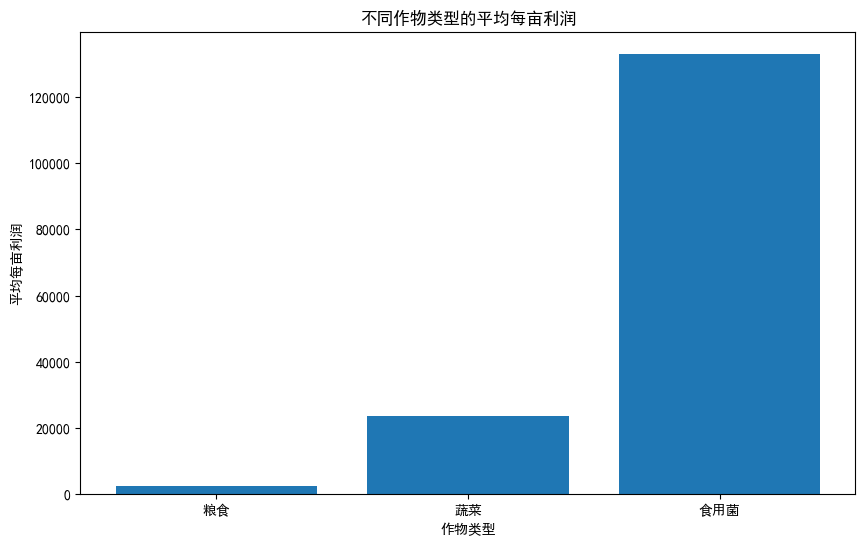

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
file_path = './2023年农作物各类数据最终版1.1.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')


# 按作物类型分组，并计算每组的平均每亩利润
average_profit = data.groupby('作物类型')['每亩利润'].mean().reset_index()

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(average_profit['作物类型'], average_profit['每亩利润'])
plt.xlabel('作物类型')  # X轴标签
plt.ylabel('平均每亩利润')  # Y轴标签
plt.title('不同作物类型的平均每亩利润')  # 图表标题
plt.show()


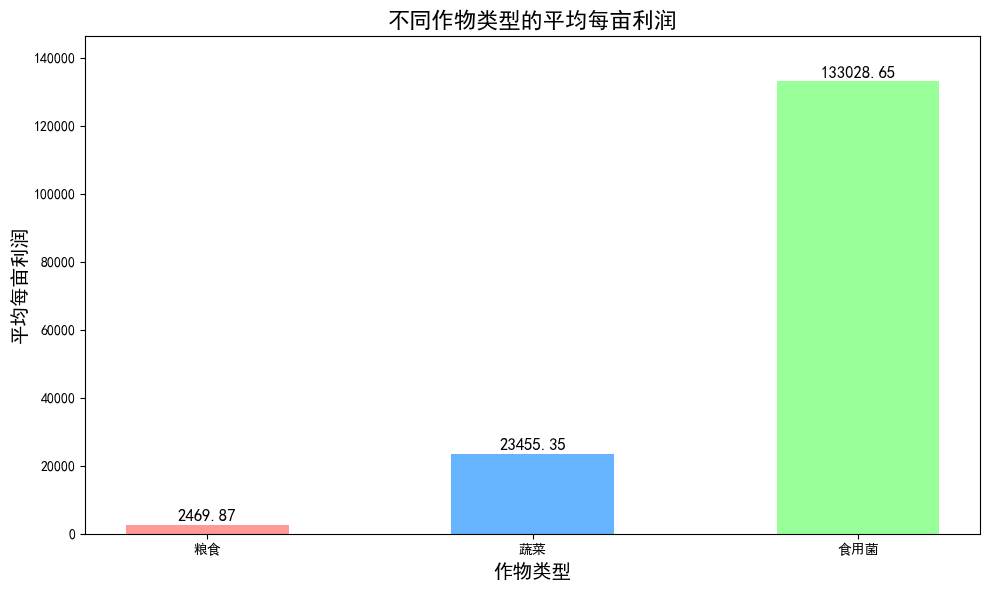

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
file_path = './2023年农作物各类数据最终版1.1.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# 按作物类型分组，并计算每组的平均每亩利润
average_profit = data.groupby('作物类型')['每亩利润'].mean().reset_index()

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 绘制柱状图
plt.figure(figsize=(10, 6))
bars = plt.bar(average_profit['作物类型'], average_profit['每亩利润'], width=0.5, color=['#FF9999','#66B3FF','#99FF99'])

# 添加数据标签
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, round(yval, 2), ha='center', va='bottom', fontsize=12)

# 调整X轴和Y轴
plt.ylim(0, max(average_profit['每亩利润']) * 1.1)  # 调整Y轴范围，使图像更紧凑
plt.xlabel('作物类型', fontsize=14)  # X轴标签
plt.ylabel('平均每亩利润', fontsize=14)  # Y轴标签
plt.title('不同作物类型的平均每亩利润', fontsize=16)  # 图表标题

# 显示图像
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import numpy as np

# 读取2023年数据
file_path = './2023年ABC地块数据.xlsx'
data_2023 = pd.read_excel(file_path)

# 清理列名，去除空白字符等问题
data_2023.columns = data_2023.columns.str.strip()

# 将所有作物列转换为数值类型，无法转换的值填充为0
data_2023.iloc[:, 2:] = data_2023.iloc[:, 2:].apply(pd.to_numeric, errors='coerce').fillna(0)

# 豆类作物列表，包括黄豆、黑豆、红豆、绿豆、爬豆
legumes = ["黄豆（豆类）", "黑豆（豆类）", "红豆（豆类）", "绿豆（豆类）", "爬豆（豆类）"]

# 获取2023年的作物总面积
crop_totals = data_2023.iloc[:, 2:].sum()

# 初始化存储生成数据的字典
result_dfs = {}

# 生成2024-2030年的数据
previous_year_data = data_2023.copy()
years = list(range(2024, 2031))

for year in years:
    # 初始化一个新的表格
    df_new = previous_year_data.copy()
    
    for i, row in df_new.iterrows():
        # 确保每块地种植的作物种类尽量少
        crops_to_plant = []
        if (year - 2023) % 3 == 0:
            # 每三年种植一次豆类
            possible_legumes = [legume for legume in legumes if legume in previous_year_data.columns]
            if all(previous_year_data.loc[i, legume] == 0 for legume in possible_legumes):
                legume_crop = np.random.choice(possible_legumes)
                crops_to_plant.append(legume_crop)
        
        # 避免连续两年种植相同作物
        last_year_crops = previous_year_data.loc[i, previous_year_data.loc[i] > 0].index.tolist()
        current_crops = [crop for crop in last_year_crops if crop not in legumes or (year - 2023) % 3 != 0]

        # 选择新的作物
        if crops_to_plant:
            chosen_crop = crops_to_plant[0]
            df_new.loc[i, chosen_crop] = crop_totals[chosen_crop] / len(df_new)
        else:
            available_crops = [crop for crop in crop_totals.index if crop in df_new.columns and crop not in current_crops]
            if available_crops:
                chosen_crop = np.random.choice(available_crops)
                df_new.loc[i, chosen_crop] = crop_totals[chosen_crop] / len(df_new)

    # 归一化每种作物的面积，以保持与2023年的总面积一致
    for crop in crop_totals.index:
        if crop in df_new.columns:
            df_new[crop] = df_new[crop] / df_new[crop].sum() * crop_totals[crop]

    # 更新生成的数据到结果字典中
    result_dfs[year] = df_new
    previous_year_data = df_new.copy()

# 保存生成的7个Excel文件
file_paths = []
for year, df in result_dfs.items():
    output_path = f'./{year}年ABC地块数据.xlsx'
    df.to_excel(output_path, index=False)
    file_paths.append(output_path)

file_paths

TypeError: '>' not supported between instances of 'str' and 'int'

In [ ]:
import pandas as pd
import numpy as np

# 读取2023年的数据
data_2023 = pd.read_excel('/mnt/data/2023年农作物各类数据最终版1.1.xlsx')

# 假设成本和收益数据来自表格
# 这里我们用单亩利润、预计销售量等信息来计算总利润
def calculate_profit(solution, excess_policy):
    total_profit = 0
    total_excess_penalty = 0
    for index, row in solution.iterrows():
        crop_name = row['作物名称']
        area = row['种植面积']
        if area < 0.1:  # 加入面积下限限制
            continue
        per_acre_profit = row['每亩利润']
        estimated_sales = row['预售量']
        total_yield = area * per_acre_profit  # 假设产量直接和利润相关
        
        if total_yield > estimated_sales:
            excess = total_yield - estimated_sales
            if excess_policy == 'waste':
                total_excess_penalty += excess * per_acre_profit  # 滞销损失
            elif excess_policy == 'discount':
                total_excess_penalty += excess * per_acre_profit * 0.5  # 降价处理
        total_profit += total_yield * per_acre_profit
    
    return total_profit - total_excess_penalty

# 初始化解（假设种植的作物和面积）
def initialize_solution(data):
    solution = data.copy()
    # 生成合理的种植方案，并确保每块地的种植面积不小于 0.1 亩
    solution['种植面积'] = np.random.uniform(0.1, solution['种植面积'].max(), size=len(solution))
    return solution

# 定义蜂群算法的目标函数
def objective_function(solution):
    # 返回一个负值，因为我们希望最大化利润，最小化损失
    return -calculate_profit(solution, 'waste')

# 初始化种群并执行蜂群算法
def bee_algorithm(data, num_iterations=100, population_size=50):
    best_solution = None
    best_profit = float('-inf')
    
    for iteration in range(num_iterations):
        for i in range(population_size):
            solution = initialize_solution(data)
            profit = objective_function(solution)
            if profit > best_profit:
                best_solution = solution
                best_profit = profit
        # 更新种群（局部搜索+全局搜索）
        # 实现蜂群算法的邻域搜索和全局搜索部分
    
    return best_solution, best_profit

# 调用蜂群算法，并预测未来七年的种植方案
yearly_solutions = []
yearly_profits = []

# 对2024-2030年分别进行优化
for year in range(2024, 2031):
    print(f"Optimizing for year {year}...")
    optimal_solution, optimal_profit = bee_algorithm(data_2023)
    yearly_solutions.append(optimal_solution)
    yearly_profits.append(optimal_profit)

    # 将结果保存到每一年的页面中
    optimal_solution.to_excel(f'/mnt/data/optimized_result_year_{year}.xlsx', index=False)

# 输出每年的最大收益
for year, profit in zip(range(2024, 2031), yearly_profits):
    print(f"Year {year}: Maximum Profit = {profit}")
